In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
annotation_file = "../metadata/ukb23158_500k_OQFE.annotations.txt"
annotation_df = pd.read_csv(annotation_file, delimiter=" ", header=None, names=["Variant", "Gene_Annotation", "Functional"])#, names=["CHROM", "POS", "A1", "A2", "Gene", "Functional"])
# annotation_df = annotation_df[annotation_df['CHROM'] == 1]
annotation_df

,Variant,Gene_Annotation,Functional
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5)
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5)
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5)
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5)
...,...,...,...
8413748,16:1775124:C:T,EME2(ENSG00000197774),synonymous
8413749,16:1775133:G:A,EME2(ENSG00000197774),LoF
8413750,16:1775313:A:G,EME2(ENSG00000197774),LoF
8413751,16:1775314:G:A,EME2(ENSG00000197774),LoF


In [3]:
# Extract the chromosomal position from the 'Variant' column (e.g., 1:69095:T:G)
annotation_df['CHROM'] = annotation_df['Variant'].apply(lambda x: x.split(':')[0].strip())
annotation_df['POS'] = annotation_df['Variant'].apply(lambda x: int(x.split(':')[1].split(':')[0].strip()))

# Now extract the alleles (A1 and A2) from the Variant column
annotation_df['A2'] = annotation_df['Variant'].apply(lambda x: x.split(':')[2].strip())  # Reference allele (A1)
annotation_df['A1'] = annotation_df['Variant'].apply(lambda x: x.split(':')[3].strip())  # Alternate allele (A2)

# Ensure A1 and A2 are single nucleotides (exclude indels)
annotation_df = annotation_df[annotation_df['A1'].str.len() == 1]  # Ensure A1 is a single nucleotide
annotation_df = annotation_df[annotation_df['A2'].str.len() == 1]  # Ensure A2 is a single nucleotide

# Classify the functional annotation into Missense, Synonymous, or LoF
annotation_df['Functional_cat'] = annotation_df['Functional'].apply(
    lambda x: 'Missense' if 'mis' in x else ('Synonymous' if 'syn' in x else ('LoF' if 'LoF' in x else 'Other'))
)

In [4]:
annotation_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5),1,69134,A,G,Missense
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense
...,...,...,...,...,...,...,...,...
8413748,16:1775124:C:T,EME2(ENSG00000197774),synonymous,16,1775124,C,T,Synonymous
8413749,16:1775133:G:A,EME2(ENSG00000197774),LoF,16,1775133,G,A,LoF
8413750,16:1775313:A:G,EME2(ENSG00000197774),LoF,16,1775313,A,G,LoF
8413751,16:1775314:G:A,EME2(ENSG00000197774),LoF,16,1775314,G,A,LoF


In [5]:
annotation_df = annotation_df[annotation_df['CHROM'] == '1']
annotation_df['Functional_cat'].value_counts()

Functional_cat
Missense      541931
Synonymous    248747
LoF            32575
Name: count, dtype: int64

In [6]:
ancestral_file = "../metadata/ancestral_vars_chr1.txt"
ancestral_df = pd.read_csv(ancestral_file, delimiter="\t")
merged_df = pd.merge(annotation_df, ancestral_df, on="POS", how="left")

In [7]:
merged_df['ANCESTRAL']=merged_df['ANCESTRAL'].str.upper()
merged_df = merged_df[merged_df['ANCESTRAL'].isin(['A','T','C','G'])]
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,T
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,C
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,T
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,A
5,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,A
...,...,...,...,...,...,...,...,...,...,...
823248,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G
823249,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G
823250,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G
823251,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G


In [8]:
freq_df = pd.read_csv('../data/chr1_ukb_all.frq',delimiter='\s+')
freq_df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65086/881832893.py:1: SyntaxWarning: invalid escape sequence '\s'
  freq_df = pd.read_csv('../data/chr1_ukb_all.frq',delimiter='\s+')


,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:69026:T:G,G,T,0.000002,939264
1,1,1:69081:G:C,C,G,0.003003,929704
2,1,1:69095:T:G,G,T,0.000002,938536
3,1,1:69134:A:G,G,A,0.000258,935528
4,1,1:69144:C:T,T,C,0.000002,936432
...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0.000003,939368
2492815,1,1:248918452:A:G,G,A,0.000001,938704
2492816,1,1:248918455:G:T,T,G,0.000002,938250
2492817,1,1:248918458:C:T,T,C,0.000003,937486


In [9]:
# Extract the chromosomal position from the 'Variant' column (e.g., 1:69095:T:G)
freq_df['CHROM'] = freq_df['SNP'].apply(lambda x: x.split(':')[0].strip())
freq_df['POS'] = freq_df['SNP'].apply(lambda x: int(x.split(':')[1].split(':')[0].strip()))

# Now extract the alleles (A1 and A2) from the Variant column
freq_df['A2'] = freq_df['SNP'].apply(lambda x: x.split(':')[2].strip())  # Reference allele (A1)
freq_df['A1'] = freq_df['SNP'].apply(lambda x: x.split(':')[3].strip())  # Alternate allele (A2)

freq_df

,CHR,SNP,A1,A2,MAF,NCHROBS,CHROM,POS
0,1,1:69026:T:G,G,T,0.000002,939264,1,69026
1,1,1:69081:G:C,C,G,0.003003,929704,1,69081
2,1,1:69095:T:G,G,T,0.000002,938536,1,69095
3,1,1:69134:A:G,G,A,0.000258,935528,1,69134
4,1,1:69144:C:T,T,C,0.000002,936432,1,69144
...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0.000003,939368,1,248918446
2492815,1,1:248918452:A:G,G,A,0.000001,938704,1,248918452
2492816,1,1:248918455:G:T,T,G,0.000002,938250,1,248918455
2492817,1,1:248918458:C:T,T,C,0.000003,937486,1,248918458


In [10]:
merged_df = pd.merge(merged_df, freq_df[['CHROM', 'POS', 'A1', 'A2', 'MAF']], how='inner', on=['CHROM', 'POS', 'A1', 'A2'])

In [11]:
merged_df = merged_df.rename(columns={'MAF':'MAF_UKB_ALL'})

In [12]:
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL,MAF_UKB_ALL
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,T,0.000002
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,C,0.000002
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,T,0.000041
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,A,0.000002
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,A,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,0.000001
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,0.000003
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,0.000004
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,0.000001


In [13]:
ref_df = pd.read_csv('../metadata/ref_vars_grch38_chr1.txt',delimiter='\t')

In [14]:
ref_df = ref_df.rename(columns={'ANCESTRAL':'REFERENCE_GRCH38','CHR':'CHROM'})
ref_df

,CHROM,POS,REFERENCE_GRCH38
0,1,1,N
1,1,2,N
2,1,3,N
3,1,4,N
4,1,5,N
...,...,...,...
248956417,1,248956418,N
248956418,1,248956419,N
248956419,1,248956420,N
248956420,1,248956421,N


In [15]:
merged_df['CHROM'] = merged_df['CHROM'].astype(int)


In [16]:
merged_df=pd.merge(merged_df,ref_df,how='inner',on=['CHROM','POS'])
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL,MAF_UKB_ALL,REFERENCE_GRCH38
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,T,0.000002,T
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,C,0.000002,C
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,T,0.000041,T
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,A,0.000002,A
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,A,0.000002,A
...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,0.000001,G
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,0.000003,G
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,0.000004,G
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,0.000001,G


In [17]:
merged_df['Ref_Status'] = merged_df.apply(lambda row: 'AncRef' if row['ANCESTRAL'] == row['REFERENCE_GRCH38'] else 'DerRef', axis=1)
merged_df


,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL,MAF_UKB_ALL,REFERENCE_GRCH38,Ref_Status
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,T,0.000002,T,AncRef
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,C,0.000002,C,AncRef
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,T,0.000041,T,AncRef
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,A,0.000002,A,AncRef
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,A,0.000002,A,AncRef
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,0.000001,G,AncRef
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,0.000003,G,AncRef
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,0.000004,G,AncRef
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,0.000001,G,AncRef


In [18]:
merged_df['Ref_Status'].value_counts()

Ref_Status
AncRef    784414
DerRef      4322
Name: count, dtype: int64

In [19]:
daf_bins = [0,0.0038,0.0076,0.015,0.031,0.061,0.12,0.18,0.31,0.46,0.61,0.78,0.84,0.92,1]
daf_labels = ['[0,0.0038)', '[0.0038,0.0076)', '[0.0076,0.015)', '[0.015,0.031)', '[0.031,0.061)', 
              '[0.061,0.12)', '[0.12,0.18)', '[0.18,0.31)', '[0.31,0.46)', '[0.46,0.61)', 
              '[0.61,0.78)', '[0.78,0.84)', '[0.84,0.92)', '[0.92,1]']

In [20]:
merged_df['DAF'] = merged_df.apply(lambda row: row['MAF_UKB_ALL'] if row['A2'] == row['ANCESTRAL'] else 1 - row['MAF_UKB_ALL'], axis=1)

In [21]:
merged_df['DAF_bin'] = pd.cut(merged_df['DAF'], bins=daf_bins, labels=daf_labels, right=False)
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL,MAF_UKB_ALL,REFERENCE_GRCH38,Ref_Status,DAF,DAF_bin
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,T,0.000002,T,AncRef,0.000002,"[0,0.0038)"
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,C,0.000002,C,AncRef,0.000002,"[0,0.0038)"
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,T,0.000041,T,AncRef,0.000041,"[0,0.0038)"
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,A,0.000002,A,AncRef,0.000002,"[0,0.0038)"
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,A,0.000002,A,AncRef,0.000002,"[0,0.0038)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,0.000001,G,AncRef,0.000001,"[0,0.0038)"
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,0.000003,G,AncRef,0.000003,"[0,0.0038)"
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,0.000004,G,AncRef,0.000004,"[0,0.0038)"
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,0.000001,G,AncRef,0.000001,"[0,0.0038)"


In [22]:
merged_df[merged_df['Ref_Status']=='AncRef']['DAF_bin'].value_counts()

DAF_bin
[0,0.0038)         779539
[0.0038,0.0076)      1091
[0.0076,0.015)        747
[0.015,0.031)         660
[0.031,0.061)         550
[0.061,0.12)          482
[0.18,0.31)           469
[0.31,0.46)           395
[0.12,0.18)           333
[0.46,0.61)            88
[0.61,0.78)             0
[0.78,0.84)             0
[0.84,0.92)             0
[0.92,1]                0
Name: count, dtype: int64

In [23]:
merged_df[merged_df['Ref_Status']=='DerRef']['DAF_bin'].value_counts()

DAF_bin
[0.92,1]           3634
[0.61,0.78)         290
[0.46,0.61)         154
[0.84,0.92)         146
[0.78,0.84)          94
[0,0.0038)            0
[0.0038,0.0076)       0
[0.0076,0.015)        0
[0.015,0.031)         0
[0.031,0.061)         0
[0.061,0.12)          0
[0.12,0.18)           0
[0.18,0.31)           0
[0.31,0.46)           0
Name: count, dtype: int64

In [24]:
colnames=['Ref_Status','DAF_bin','prop_syn','prop_mis','prop_lof','num_snps']
fcat=['Synonymous','Missense','LoF']
res = pd.DataFrame(columns=colnames)
for dbin in daf_labels:
    for stat in ['AncRef','DerRef']:
        temp = merged_df[(merged_df['Ref_Status']==stat) & (merged_df['DAF_bin']==dbin)]
        allele_count = len(temp)
        if len(temp)>0:
            prop_func = temp['Functional_cat'].value_counts(normalize=True).reindex(fcat, fill_value=0).tolist() # order is Syn Mis LoF
            row = [stat,dbin,prop_func[0],prop_func[1],prop_func[2],allele_count]
        else:
            row = [stat,dbin,np.nan,np.nan,np.nan,allele_count]
        temp_df = pd.DataFrame([row], columns=colnames)
        res = pd.concat([res, temp_df], ignore_index=True)
        

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65086/2495643047.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, temp_df], ignore_index=True)


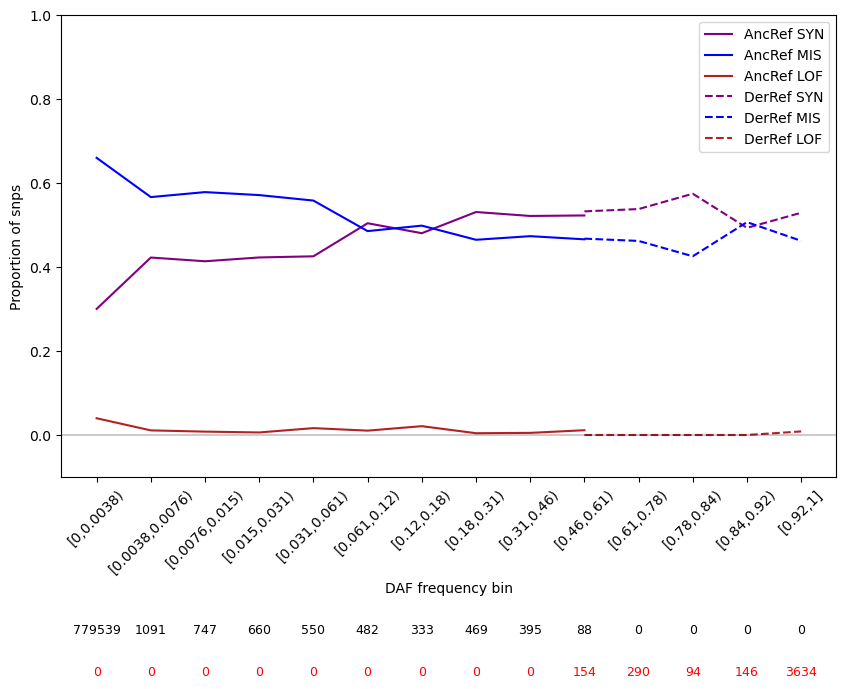

In [25]:
linestyle_map = {'AncRef':'-','DerRef':'--'}

plt.figure(figsize=(10,6))
for status in res['Ref_Status'].unique():
    status_data = res[res['Ref_Status'] == status]  
    plt.plot(status_data['DAF_bin'], status_data['prop_syn'], linestyle=linestyle_map[status], label=f'{status} SYN',color='purple')
    plt.plot(status_data['DAF_bin'], status_data['prop_mis'], linestyle=linestyle_map[status], label=f'{status} MIS',color='blue')
    plt.plot(status_data['DAF_bin'], status_data['prop_lof'], linestyle=linestyle_map[status], label=f'{status} LOF',color='firebrick')

for i, row in res[res['Ref_Status'] == 'AncRef'].iterrows():
    plt.text(row['DAF_bin'], -0.45, str(row['num_snps']), ha='center', va='top', fontsize=9, color='black')

for i, row in res[res['Ref_Status'] == 'DerRef'].iterrows():
    plt.text(row['DAF_bin'], -0.55, str(row['num_snps']), ha='center', va='top', fontsize=9, color='red')
plt.legend()
plt.ylim(-0.1,1)
plt.xticks(rotation=45)
plt.axhline(0,color='black',alpha=0.2)
plt.xlabel('DAF frequency bin')
plt.ylabel('Proportion of snps')
plt.show()

In [26]:
res

,Ref_Status,DAF_bin,prop_syn,prop_mis,prop_lof,num_snps
0,AncRef,"[0,0.0038)",0.300235,0.659923,0.039841,779539
1,DerRef,"[0,0.0038)",NaN,NaN,NaN,0
2,AncRef,"[0.0038,0.0076)",0.422548,0.566453,0.010999,1091
3,DerRef,"[0.0038,0.0076)",NaN,NaN,NaN,0
4,AncRef,"[0.0076,0.015)",0.413655,0.578313,0.008032,747
5,DerRef,"[0.0076,0.015)",NaN,NaN,NaN,0
6,AncRef,"[0.015,0.031)",0.422727,0.571212,0.006061,660
7,DerRef,"[0.015,0.031)",NaN,NaN,NaN,0
8,AncRef,"[0.031,0.061)",0.425455,0.558182,0.016364,550
9,DerRef,"[0.031,0.061)",NaN,NaN,NaN,0
